In [1]:
import pandas as pd
import numpy as np

print("Notebook is ready")


Notebook is ready


In [3]:
df = pd.read_csv("../data/netflix_titles_raw.csv")


In [4]:
df.shape


(8807, 12)

In [5]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Dataset Structure and Columns

The dataset contains information related to Netflix movies and TV shows.
Each row represents a unique title available on the platform.

Key columns include:
- show_id: Unique identifier for each title
- type: Indicates whether the content is a Movie or TV Show
- title: Name of the movie or TV show
- director: Director(s) of the content
- cast: Main actors involved
- country: Country of production
- date_added: Date when the content was added to Netflix
- release_year: Original release year
- rating: Content rating (e.g., TV-MA, PG-13)
- duration: Duration in minutes (movies) or seasons (TV shows)
- listed_in: Genre/category of the content
- description: Brief summary of the content

Some columns contain missing values and inconsistent formats,
which will be addressed in the data cleaning stage.


In [8]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Quality Issues Identified

The dataset contains several data quality issues:
- Missing values in columns such as director, cast, and country
- Date values stored as text instead of datetime format
- Duration stored as text instead of numeric values
- Multiple categories stored in a single column (listed_in)

These issues can affect accurate analysis and visualization,
therefore data cleaning is required before further analysis.


In [9]:
df_clean = df.copy()


In [10]:
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Not Specified')


In [11]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')


In [12]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month


In [13]:
df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)


In [14]:
df_clean.drop_duplicates(inplace=True)


In [15]:
df_clean.to_csv("../data/netflix_cleaned.csv", index=False)


In [16]:
df_clean['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Movies vs TV Shows on Netflix'}, xlabel='type'>

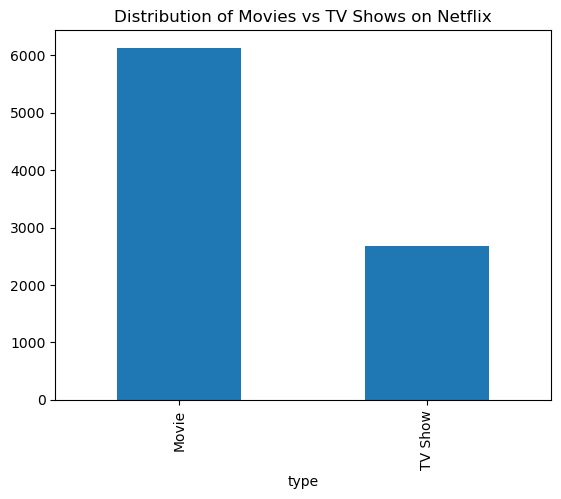

In [18]:
df_clean['type'].value_counts().plot(
    kind='bar',
    title='Distribution of Movies vs TV Shows on Netflix'
)

<Axes: title={'center': 'Netflix Content Added Over the Years'}, xlabel='year_added'>

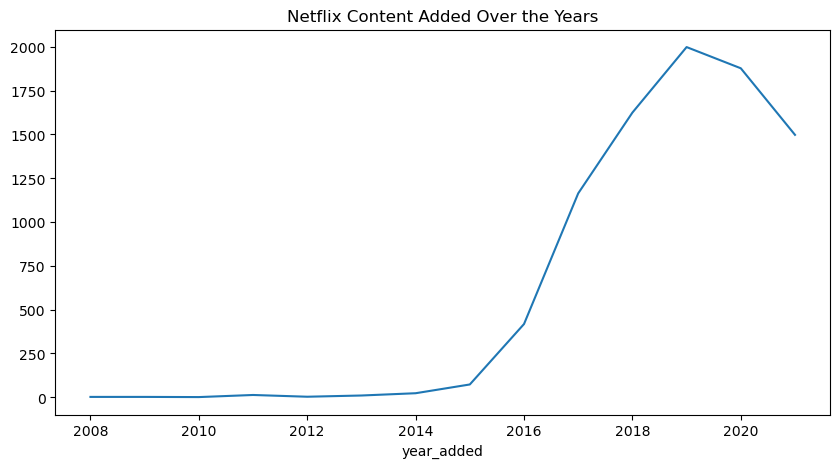

In [19]:
df_clean['year_added'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10,5),
    title='Netflix Content Added Over the Years'
)

In [20]:
df_clean['country'].value_counts().head(10)

country
United States     2818
India              972
Not Specified      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [21]:
df_clean['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

<Axes: title={'center': 'Content Rating Distribution on Netflix'}, xlabel='rating'>

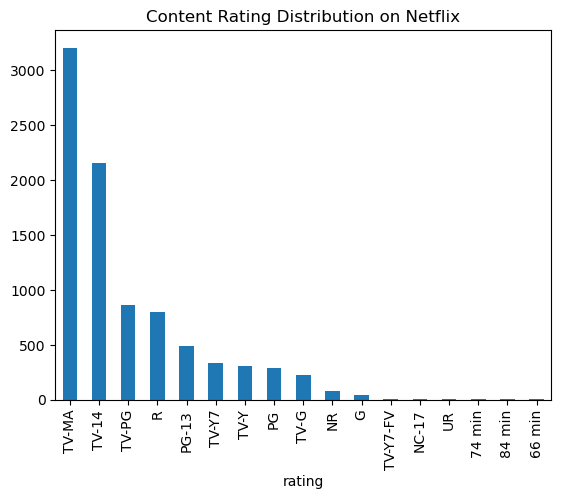

In [22]:
df_clean['rating'].value_counts().plot(
    kind='bar',
    title='Content Rating Distribution on Netflix'
)

In [23]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect("../data/netflix.db")
cursor = conn.cursor()

print("Database created and connected")


Database created and connected


In [24]:
df_clean.to_sql("netflix", conn, if_exists="replace", index=False)

print("Data loaded into SQL table")

Data loaded into SQL table


In [25]:
cursor.execute("SELECT COUNT(*) FROM netflix")
cursor.fetchone()

(8807,)

In [26]:
cursor.execute("""
SELECT type, COUNT(*) AS total_titles
FROM netflix
GROUP BY type
""")
cursor.fetchall()

[('Movie', 6131), ('TV Show', 2676)]

In [27]:
cursor.execute("""
SELECT country, COUNT(*) AS total_titles
FROM netflix
WHERE country != 'Not Specified'
GROUP BY country
ORDER BY total_titles DESC
LIMIT 10
""")
cursor.fetchall()

[('United States', 2818),
 ('India', 972),
 ('United Kingdom', 419),
 ('Japan', 245),
 ('South Korea', 199),
 ('Canada', 181),
 ('Spain', 145),
 ('France', 124),
 ('Mexico', 110),
 ('Egypt', 106)]

In [28]:
cursor.execute("""
SELECT year_added, COUNT(*) AS titles_added
FROM netflix
WHERE year_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added
""")
cursor.fetchall()

[(2008.0, 2),
 (2009.0, 2),
 (2010.0, 1),
 (2011.0, 13),
 (2012.0, 3),
 (2013.0, 10),
 (2014.0, 23),
 (2015.0, 73),
 (2016.0, 418),
 (2017.0, 1164),
 (2018.0, 1625),
 (2019.0, 1999),
 (2020.0, 1878),
 (2021.0, 1498)]

In [29]:
cursor.execute("""
SELECT rating, COUNT(*) AS count_rating
FROM netflix
GROUP BY rating
ORDER BY count_rating DESC
""")
cursor.fetchall()

[('TV-MA', 3207),
 ('TV-14', 2160),
 ('TV-PG', 863),
 ('R', 799),
 ('PG-13', 490),
 ('TV-Y7', 334),
 ('TV-Y', 307),
 ('PG', 287),
 ('TV-G', 220),
 ('NR', 80),
 ('G', 41),
 ('TV-Y7-FV', 6),
 (None, 4),
 ('UR', 3),
 ('NC-17', 3),
 ('84 min', 1),
 ('74 min', 1),
 ('66 min', 1)]

In [30]:
cursor.execute("""
SELECT AVG(duration_value)
FROM netflix
WHERE type = 'Movie'
""")
cursor.fetchall()

[(99.57718668407311,)]

In [31]:
cursor.execute("""
SELECT title, duration_value
FROM netflix
WHERE type = 'Movie'
ORDER BY duration_value DESC
LIMIT 10
""")
cursor.fetchall()

[('Black Mirror: Bandersnatch', 312.0),
 ('Headspace: Unwind Your Mind', 273.0),
 ('The School of Mischief', 253.0),
 ('No Longer kids', 237.0),
 ('Lock Your Girls In', 233.0),
 ('Raya and Sakina', 230.0),
 ('Once Upon a Time in America', 229.0),
 ('Sangam', 228.0),
 ('Lagaan', 224.0),
 ('Jodhaa Akbar', 214.0)]

In [32]:
cursor.execute("""
SELECT director, COUNT(*) AS total_titles
FROM netflix
WHERE director != 'Unknown'
GROUP BY director
ORDER BY total_titles DESC
LIMIT 10
""")
cursor.fetchall()

[('Rajiv Chilaka', 19),
 ('Raúl Campos, Jan Suter', 18),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16),
 ('Jay Karas', 14),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11)]

In [33]:
cursor.execute("""
SELECT listed_in, COUNT(*) AS total_titles
FROM netflix
GROUP BY listed_in
ORDER BY total_titles DESC
LIMIT 10
""")
cursor.fetchall()

[('Dramas, International Movies', 362),
 ('Documentaries', 359),
 ('Stand-Up Comedy', 334),
 ('Comedies, Dramas, International Movies', 274),
 ('Dramas, Independent Movies, International Movies', 252),
 ("Kids' TV", 220),
 ('Children & Family Movies', 215),
 ('Children & Family Movies, Comedies', 201),
 ('Documentaries, International Movies', 186),
 ('Dramas, International Movies, Romantic Movies', 180)]

In [34]:
cursor.execute("""
SELECT COUNT(*)
FROM netflix
WHERE type = 'Movie' AND release_year > 2015
""")
cursor.fetchall()

[(3619,)]

In [35]:
cursor.execute("""
SELECT title, duration
FROM netflix
WHERE type = 'TV Show' AND duration_value > 3
""")
cursor.fetchall()

[('The Great British Baking Show', '9 Seasons'),
 ('Dear White People', '4 Seasons'),
 ('Resurrection: Ertugrul', '5 Seasons'),
 ('Nailed It', '6 Seasons'),
 ('Numberblocks', '6 Seasons'),
 ('Saved by the Bell', '9 Seasons'),
 ('Jack Whitehall: Travels with My Father', '5 Seasons'),
 ('Lucifer', '6 Seasons'),
 ('Mighty Raju', '4 Seasons'),
 ("Bunk'd", '5 Seasons'),
 ('La casa de papel', '5 Seasons'),
 ('Major Dad', '4 Seasons'),
 ('Family Reunion', '4 Seasons'),
 ('Go! Go! Cory Carson', '5 Seasons'),
 ('Fast & Furious Spy Racers', '5 Seasons'),
 ('Grace and Frankie', '7 Seasons'),
 ('30 Rock', '7 Seasons'),
 ('Friday Night Lights', '5 Seasons'),
 ('Hunter X Hunter (2011)', '6 Seasons'),
 ('The Flash', '7 Seasons'),
 ('Mighty Express', '4 Seasons'),
 ('The Walking Dead', '10 Seasons'),
 ('Wynonna Earp', '4 Seasons'),
 ('Chicago Med', '5 Seasons'),
 ('Atypical', '4 Seasons'),
 ('Code Lyoko', '4 Seasons'),
 ('Cuckoo', '5 Seasons'),
 ("Kim's Convenience", '5 Seasons'),
 ('My Little Pony: F

In [36]:
conn.close()